In [2]:
import pandas as pd
import datetime
from math import radians, cos, sin, asin, sqrt
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def parse_timestamp(time_in_secs):    
    return datetime.datetime.fromtimestamp(int(time_in_secs) / 1e6)

def df_dist(row):
    return haversine(row['Lon'], row['Lat'], row['Lon_prev'], row['Lat_prev'])

def numpy_dist(row):
    return haversine(row[0], row[1], row[2], row[3])

def df_speed(row):
    if not row['Time deltas'].total_seconds():
        return 0
    m_s = row['Traveled dist'] * 1000 / row['Time deltas'].total_seconds()
    km_h = m_s * 3.6
    return km_h

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [4]:
# Columns description
# Timestamp micro since 1970 01 01 00:00:00 GMT'
# Line ID
# Direction
# Journey Pattern ID
# Time Frame (The start date of the production time table - in Dublin the production time table starts at 6am and ends at 3am)
# Vehicle Journey ID (A given run on the journey pattern)
# Operator (Bus operator, not the driver)
# Congestion [0=no,1=yes]
# Lon WGS84
# Lat WGS84
# Delay (seconds, negative if bus is ahead of schedule)
# Block ID (a section ID of the journey pattern)
# Vehicle ID
# Stop ID
# At Stop [0=no,1=yes]

categorical_columns = ['Line ID', 'Direction', 'Journey Pattern ID', 'Vehicle Journey ID', 'Operator', 'Congestion', 'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop']
df = pd.read_csv('sir140113-200113/siri.20130115.csv.gz',
                 names=['Timestamp', 'Line ID', 'Direction', 'Journey Pattern ID', 'Time Frame', 'Vehicle Journey ID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay', 'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop'],
                 parse_dates=[0], date_parser=parse_timestamp,
                 dtype={col_name: 'category' for col_name in categorical_columns},
                 na_values=['null'])

df = df.dropna(subset=['Journey Pattern ID'])

In [5]:
df.columns

Index(['Timestamp', 'Line ID', 'Direction', 'Journey Pattern ID', 'Time Frame',
       'Vehicle Journey ID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay',
       'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop'],
      dtype='object')

In [6]:
df.dtypes

Timestamp             datetime64[ns]
Line ID                     category
Direction                   category
Journey Pattern ID          category
Time Frame                    object
Vehicle Journey ID          category
Operator                    category
Congestion                  category
Lon                          float64
Lat                          float64
Delay                          int64
Block ID                    category
Vehicle ID                  category
Stop ID                     category
At Stop                     category
dtype: object

In [7]:
for c in categorical_columns:
    print(c)
    print(df[c].unique())
    print('-----')

Line ID
[9, 4, 46, 38, 151, ..., 142, 111, 118, 116, 331]
Length: 65
Categories (65, object): [9, 4, 46, 38, ..., 111, 118, 116, 331]
-----
Direction
[0]
Categories (1, object): [0]
-----
Journey Pattern ID
[00091001, 00040001, 00471001, 00700001, 01510002, ..., 01400002, 01230002, 00841004, 00111002, 00371002]
Length: 438
Categories (438, object): [00091001, 00040001, 00471001, 00700001, ..., 01230002, 00841004, 00111002, 00371002]
-----
Vehicle Journey ID
[3688, 4555, 6767, 1314, 3890, ..., 4621, 4288, 1580, 4465, 736]
Length: 7336
Categories (7336, object): [3688, 4555, 6767, 1314, ..., 4288, 1580, 4465, 736]
-----
Operator
[PO, HN, D2, CD, D1, RD, SL, CF]
Categories (8, object): [PO, HN, D2, CD, D1, RD, SL, CF]
-----
Congestion
[0, 1]
Categories (2, object): [0, 1]
-----
Block ID
[9013, 4001, 46020, 38014, 151006, ..., 15035, 12009, 83019, 41069, 41068]
Length: 872
Categories (872, object): [9013, 4001, 46020, 38014, ..., 12009, 83019, 41069, 41068]
-----
Vehicle ID
[33434, 38068, 

In [8]:
df.head()

,Timestamp,Line ID,Direction,Journey Pattern ID,Time Frame,Vehicle Journey ID,Operator,Congestion,Lon,Lat,Delay,Block ID,Vehicle ID,Stop ID,At Stop
1,2013-01-15 04:00:02,9,0,00091001,2013-01-14,3688,PO,0,-6.271367,53.367332,856,9013,33434,7131,1
3,2013-01-15 04:00:02,4,0,00040001,2013-01-14,4555,HN,0,-6.182133,53.302116,155,4001,38068,7226,1
5,2013-01-15 04:00:02,46,0,00471001,2013-01-14,6767,D2,0,-6.232573,53.341656,-501,46020,33078,392,0
6,2013-01-15 04:00:02,38,0,00700001,2013-01-14,1314,PO,0,-6.474326,53.419418,-606,38014,33438,3332,0
7,2013-01-15 04:00:02,151,0,01510002,2013-01-14,3890,CD,0,-6.432064,53.329544,-285,151006,43029,4554,0


In [9]:
df.describe()

,Lon,Lat,Delay
count,1.478405e+06,1.478405e+06,1.478405e+06
mean,-6.270566e+00,5.334413e+01,-5.191316e+01
std,8.158094e-02,5.422711e-02,4.669243e+02
min,-6.615033e+00,5.307042e+01,-5.985000e+03
25%,-6.306553e+00,5.331944e+01,-2.720000e+02
50%,-6.261727e+00,5.334604e+01,-2.300000e+01
75%,-6.231933e+00,5.337297e+01,1.200000e+02
max,-6.053085e+00,5.360652e+01,7.065000e+03


In [10]:
# Ugly way to make coordinates start at 0. http://spatialreference.org/ref/epsg/wgs-84/
df['Lat'] += 180
df['Lon'] += 90

In [11]:
df.describe()

,Lon,Lat,Delay
count,1.478405e+06,1.478405e+06,1.478405e+06
mean,8.372943e+01,2.333441e+02,-5.191316e+01
std,8.158094e-02,5.422711e-02,4.669243e+02
min,8.338497e+01,2.330704e+02,-5.985000e+03
25%,8.369345e+01,2.333194e+02,-2.720000e+02
50%,8.373827e+01,2.333460e+02,-2.300000e+01
75%,8.376807e+01,2.333730e+02,1.200000e+02
max,8.394692e+01,2.336065e+02,7.065000e+03


In [12]:
lat_min = df['Lat'].min()
lat_range = df['Lat'].max() - lat_min
lon_min = df['Lon'].min()
lon_range = df['Lon'].max() - lon_min

In [13]:
# Get coordinate step for given number of cells.
num_cells = 600
lat_step = lat_range / num_cells
lon_step = lon_range / num_cells
print(lat_step)
print('lat step: {:.2f}km'.format(haversine(0, 0, lat_step, 0)))
print('lon step: {:.2f}km'.format(haversine(0, 0, lon_step, 0)))

0.000893505
lat step: 0.10km
lon step: 0.10km


In [14]:
df.head()

,Timestamp,Line ID,Direction,Journey Pattern ID,Time Frame,Vehicle Journey ID,Operator,Congestion,Lon,Lat,Delay,Block ID,Vehicle ID,Stop ID,At Stop
1,2013-01-15 04:00:02,9,0,00091001,2013-01-14,3688,PO,0,83.728633,233.367332,856,9013,33434,7131,1
3,2013-01-15 04:00:02,4,0,00040001,2013-01-14,4555,HN,0,83.817867,233.302116,155,4001,38068,7226,1
5,2013-01-15 04:00:02,46,0,00471001,2013-01-14,6767,D2,0,83.767427,233.341656,-501,46020,33078,392,0
6,2013-01-15 04:00:02,38,0,00700001,2013-01-14,1314,PO,0,83.525674,233.419418,-606,38014,33438,3332,0
7,2013-01-15 04:00:02,151,0,01510002,2013-01-14,3890,CD,0,83.567936,233.329544,-285,151006,43029,4554,0


In [15]:
# df = df.sort_values(['Lat', 'Lon'])

In [16]:
import logging
from timeit import default_timer
class Timer:
    def __init__(self, message, logger=None, log_level=logging.DEBUG):
        self.message = message
        self.logger = logger
        self.log_level = log_level

    def __enter__(self):
        self.start = default_timer()
        return self

    def __exit__(self, *args):
        self.end = default_timer()
        self.duration = self.end - self.start
        self.duration_message = '{} {:.4f}'.format(self.message, self.duration)
        if self.logger:
            self.logger.log(self.log_level, self.duration_message)
        else:
            if self.duration > 0.01:
                print(self.duration_message)

In [17]:
%%time
from timeit import default_timer
idx = 0
df_with_speeds = []
unique_line_ids = df['Line ID'].unique()
print(len(unique_line_ids), 'unique line ids')

for line_id in unique_line_ids:
    line_id_df = df[df['Line ID'] == line_id]
    
    unique_journeys = line_id_df['Vehicle Journey ID'].unique()
    print(len(unique_journeys), 'unique journeys')

    t = default_timer()
    for journey_id in unique_journeys:
        idx += 1
        if idx % 100 == 0:
            print(idx, default_timer() - t)
            t = default_timer()

        journey_df = line_id_df[line_id_df['Vehicle Journey ID'] == journey_id]
        if len(journey_df) < 2:        
            continue

        journey_df = journey_df.sort_values('Timestamp')
        journey_df = journey_df.join(journey_df[['Timestamp', 'Lon', 'Lat']].shift(), rsuffix='_prev')
        journey_df['Time deltas'] = journey_df['Timestamp'] - journey_df['Timestamp_prev']
        journey_df['Time deltas sec'] = journey_df['Time deltas'].astype('timedelta64[s]')
        journey_df['Traveled dist'] = np.apply_along_axis(numpy_dist, 1, journey_df[['Lon', 'Lat', 'Lon_prev', 'Lat_prev']].values)
        journey_df['Speed'] = 3600 * journey_df['Traveled dist'] / journey_df['Time deltas sec']    
        journey_df.loc[journey_df['Time deltas sec'] == 0, 'Speed'] = 0
        
        df_with_speeds.append(journey_df)

df_with_speeds = pd.concat(df_with_speeds)

65 unique line ids
177 unique journeys
100 1.394127574000322
177 unique journeys
200 0.2951557410001442
300 1.3623943920001693
317 unique journeys
400 0.67478526900004
500 1.5996070809997036
600 1.5713806679996196
217 unique journeys
700 0.4327109659998314
800 1.4237424160000955
170 unique journeys
900 0.14932948700015913
1000 1.2507353349997175
160 unique journeys
1100 0.6228343159996257
1200 1.4580429940001522
219 unique journeys
1300 1.1783211840001968
1400 1.5339929420001681
86 unique journeys
1500 0.8655978480001068
388 unique journeys
1600 1.133370159000151
1700 1.246412225000313
1800 1.3985715989997516
1900 1.3432488489997922
120 unique journeys
2000 1.0844543160001194
488 unique journeys
2100 1.0220697979998477
2200 1.3462927220002712
2300 1.3646528730000682
2400 1.4372109870000713
2500 1.2743142790000093
278 unique journeys
2600 1.2699145240003418
2700 1.541777429999911
123 unique journeys
2800 0.03327351000007184
2900 1.3719088520001606
136 unique journeys
3000 1.094043550000

In [18]:
df_with_speeds.describe()

,Lon,Lat,Delay,Lon_prev,Lat_prev,Time deltas,Time deltas sec,Traveled dist,Speed
count,1.476691e+06,1.476691e+06,1.476691e+06,1.469024e+06,1.469024e+06,1469024,1.469024e+06,1.469024e+06,1.469024e+06
mean,8.372944e+01,2.333441e+02,-5.217487e+01,8.372944e+01,2.333441e+02,0 days 00:00:40.525587,4.052559e+01,1.097364e-01,1.960697e+01
std,8.156173e-02,5.421235e-02,4.669901e+02,8.149608e-02,5.416823e-02,0 days 00:16:09.163845,9.691638e+02,3.509686e-01,8.550482e+01
min,8.338497e+01,2.330704e+02,-5.985000e+03,8.338497e+01,2.330704e+02,0 days 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.369346e+01,2.333195e+02,-2.720000e+02,8.369348e+01,2.333195e+02,0 days 00:00:19,1.900000e+01,2.112704e-03,4.106693e-01
50%,8.373826e+01,2.333460e+02,-2.300000e+01,8.373822e+01,2.333460e+02,0 days 00:00:20,2.000000e+01,7.322994e-02,1.295862e+01
75%,8.376805e+01,2.333730e+02,1.190000e+02,8.376803e+01,2.333729e+02,0 days 00:00:21,2.100000e+01,1.589293e-01,2.800181e+01
max,8.394692e+01,2.336065e+02,7.065000e+03,8.394692e+01,2.336065e+02,0 days 23:57:03,8.622300e+04,3.625269e+01,2.290056e+04


0 0.0009110569999393192 num samples: 0


/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/ipykernel/__main__.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lat_idx 0 lon_idx 588
Cell line ID 84
0     75
1    150
Name: At Stop, dtype: int64
Is stop: True
Num cell points 225
Num line points 184
Num journeys 26


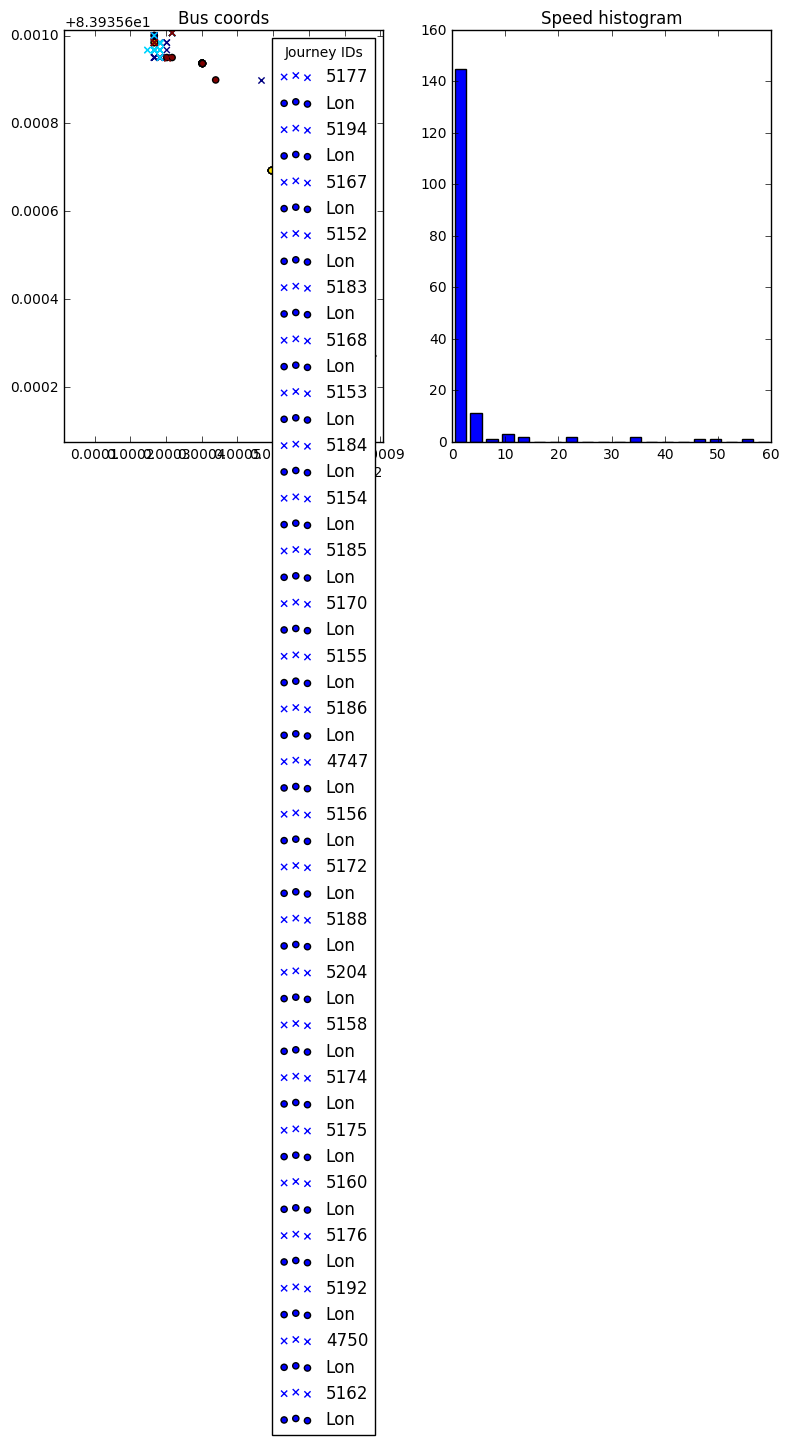

lat_idx 0 lon_idx 588
Cell line ID 145
0     75
1    150
Name: At Stop, dtype: int64
Is stop: True
Num cell points 225
Num line points 41
Num journeys 5


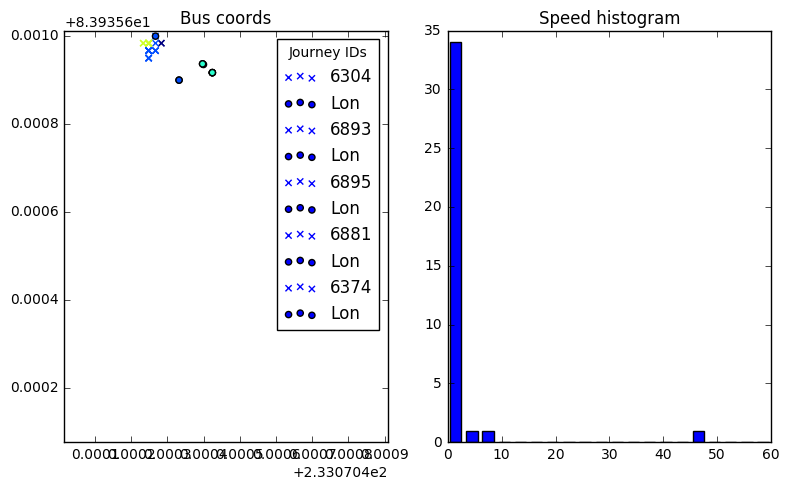

lat_idx 0 lon_idx 589
Cell line ID 84
0      2
1    218
Name: At Stop, dtype: int64
Is stop: True
Num cell points 220
Num line points 172
Num journeys 17


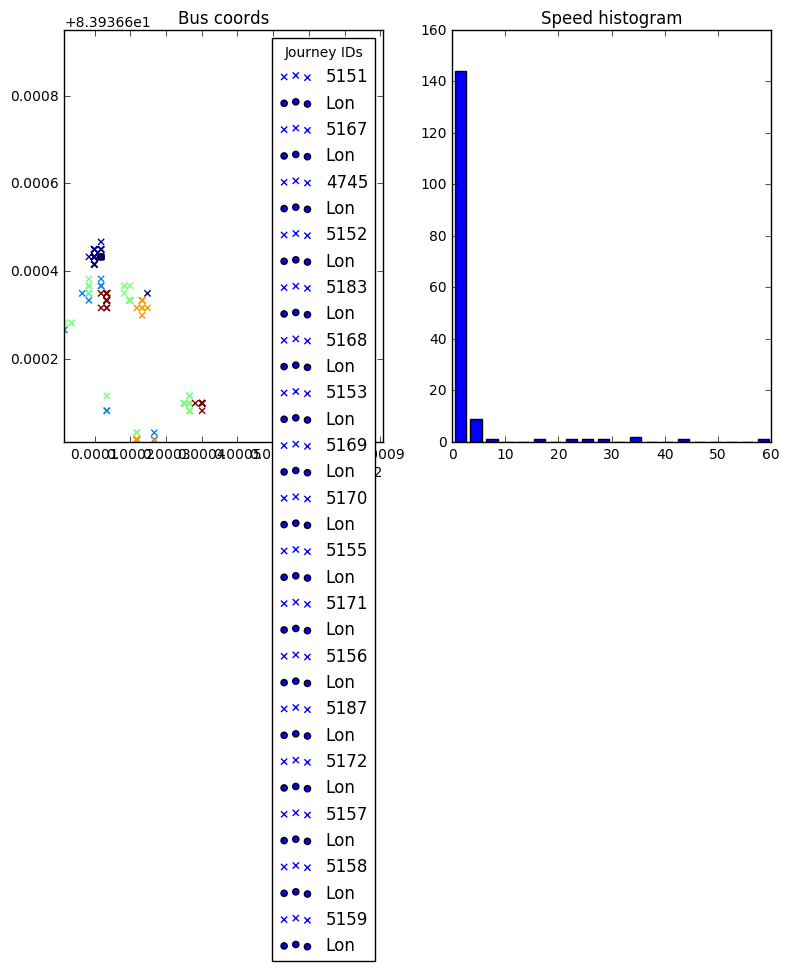

lat_idx 0 lon_idx 589
Cell line ID 145
0      2
1    218
Name: At Stop, dtype: int64
Is stop: True
Num cell points 220
Num line points 48
Num journeys 4


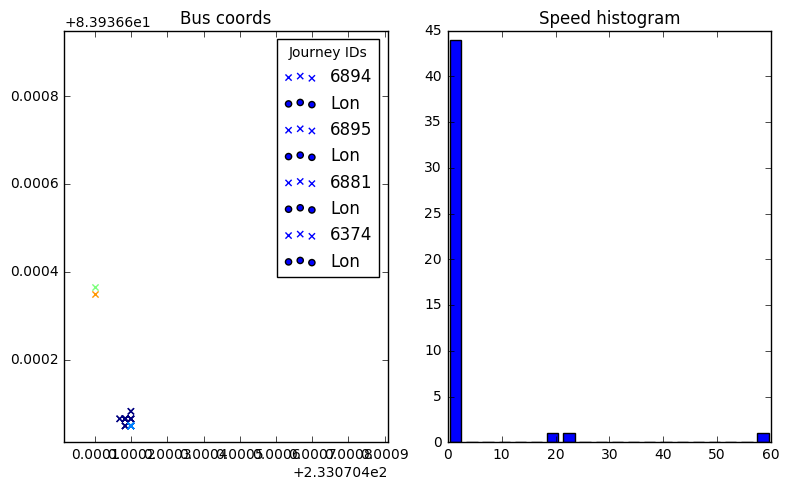

1 4.007086605999575 num samples: 4


KeyboardInterrupt: 

In [44]:
# %%time
from timeit import default_timer
t = default_timer()
X = []
y = []
show_debug_data = True
save_csvs = False

for lat_idx in range(num_cells):
    if lat_idx % 1 == 0:
        print(lat_idx, default_timer() - t, 'num samples:', len(X))
        t = default_timer()
        
    lat_start, lat_stop = lat_min + lat_idx * lat_step, lat_min + (lat_idx + 1) * lat_step
    df_lat_slice = df_with_speeds[(lat_start <= df_with_speeds['Lat']) & (df_with_speeds['Lat'] < lat_stop)]

    for lon_idx in range(num_cells):
        lon_start, lon_stop = lon_min + lon_idx * lon_step, lon_min + (lon_idx + 1) * lon_step
        cell_data = df_lat_slice[(lon_start <= df_lat_slice['Lon']) & (df_lat_slice['Lon'] < lon_stop)]
        if cell_data.shape[0] < 25:
            continue
        
        cell_value_counts = cell_data['At Stop'].value_counts(sort=False)
            
        for cell_line_id in cell_data['Line ID'].unique():
            if show_debug_data:
                plt.close()
                fig = plt.figure(figsize=(8,5))
                ax1 = fig.add_subplot(121)
                plt.title('Bus coords')
                axes = plt.gca()
                axes.set_xlim([lat_start, lat_stop])
                axes.set_ylim([lon_start, lon_stop])
                X_len_before = len(X)
                cmap = plt.get_cmap('jet', len(line_id_df['Vehicle Journey ID'].unique()))
                
            line_id_df = cell_data[cell_data['Line ID'] == cell_line_id]
            num_unique_journeys = len(line_id_df['Vehicle Journey ID'].unique())
            value_counts = np.zeros(2)
            line_hist = None
            line_bins = None
            
            for journey_idx, cell_journey_id in enumerate(line_id_df['Vehicle Journey ID'].unique()):
                journey_df = line_id_df[line_id_df['Vehicle Journey ID'] == cell_journey_id]
                
                if save_csvs:
                    save_dir = os.path.join('journey', str(lat_idx), str(lon_idx), cell_line_id)
                    os.makedirs(save_dir, exist_ok=True)
                    journey_df.to_csv(os.path.join(save_dir, cell_journey_id + '.csv'))

                journey_value_counts = journey_df['At Stop'].value_counts(sort=False)
                features, bins = np.histogram(journey_df['Speed'], bins=20, range=(0, 60))
                if line_hist is None:
                    line_hist = features
                    line_bins = bins
                else:
                    line_hist += features
                value_counts += journey_value_counts
                
                if show_debug_data:
                    at_stop_line_id_df = journey_df[journey_df['At Stop'] == '1']
                    ax1.scatter(at_stop_line_id_df['Lat'], at_stop_line_id_df['Lon'], marker='x', c=[journey_idx] * at_stop_line_id_df.shape[0], label=cell_journey_id, cmap=cmap, vmin=0, vmax=num_unique_journeys)
                    not_at_stop_line_id_df = journey_df[journey_df['At Stop'] == '0']
                    ax1.scatter(not_at_stop_line_id_df['Lat'], not_at_stop_line_id_df['Lon'], marker='o', c=[journey_idx] * not_at_stop_line_id_df.shape[0], label=cell_journey_id, cmap=cmap, vmin=0, vmax=num_unique_journeys)
                
            if line_hist is not None:
                is_stop = value_counts['1'] > value_counts['0']
                if np.sum(line_hist) > 1:
                    X.append(line_hist / np.sum(line_hist))                    
                    y.append(is_stop)

            if show_debug_data:
                if len(X) != X_len_before:
                    print('lat_idx', lat_idx, 'lon_idx', lon_idx)
                    print('Cell line ID', cell_line_id)
                    print(cell_value_counts)
                    print('Is stop:', is_stop)
                    print('Num cell points', cell_data.shape[0])
                    print('Num line points', line_id_df.shape[0])
                    print('Num journeys', num_unique_journeys)
                    plt.legend(title='Journey IDs', loc=0)
                    
                    width = 0.7 * (line_bins[1] - line_bins[0])
                    center = (line_bins[:-1] + line_bins[1:]) / 2
                    plt.subplot(122)
                    plt.title('Speed histogram')
                    plt.bar(center, line_hist, align='center', width=width)
                    plt.tight_layout()
                    plt.show()
                else:
                    plt.close()
                    
print('num samples:', len(X))
# print(X)
# print(y)

In [62]:
df_with_speeds.describe()

,Lon,Lat,Delay,Lon_prev,Lat_prev,Time deltas,Traveled dist,Speed
count,1.462149e+06,1.462149e+06,1.462149e+06,1.454483e+06,1.454483e+06,1454483,1.454483e+06,1.454483e+06
mean,8.373018e+01,2.333439e+02,-1.048066e+02,8.373019e+01,2.333439e+02,0 days 00:00:33.197645,1.091156e-01,4.525145e+06
std,8.183703e-02,5.469092e-02,4.522215e+02,8.177642e-02,5.464940e-02,0 days 00:09:53.584214,3.267777e-01,1.147286e+08
min,8.338498e+01,2.330704e+02,-4.698000e+03,8.338498e+01,2.330704e+02,0 days 00:00:00,0.000000e+00,0.000000e+00
25%,8.369386e+01,2.333190e+02,-3.220000e+02,8.369389e+01,2.333190e+02,0 days 00:00:18,1.909409e-03,2.188528e+05
50%,8.373883e+01,2.333461e+02,-5.400000e+01,8.373880e+01,2.333461e+02,0 days 00:00:20,7.292768e-02,4.975815e+05
75%,8.376920e+01,2.333730e+02,6.700000e+01,8.376919e+01,2.333730e+02,0 days 00:00:21,1.610503e-01,1.164514e+06
max,8.394692e+01,2.336065e+02,6.006000e+03,8.394692e+01,2.336065e+02,0 days 16:29:52,2.881640e+01,5.934958e+10


In [29]:
df[df['Vehicle Journey ID'] == '4746']

,Timestamp,Line ID,Direction,Journey Pattern ID,Time Frame,Vehicle Journey ID,Operator,Congestion,Lon,Lat,Delay,Block ID,Vehicle ID,Stop ID,At Stop
537445,2013-01-14 14:57:49,16,0,00161001,2013-01-14,4746,SL,0,83.756883,233.271885,0,16006,33119,5171,1
537926,2013-01-14 14:58:09,16,0,00161001,2013-01-14,4746,SL,0,83.755400,233.271801,0,16006,33119,5171,1
538305,2013-01-14 14:58:26,16,0,00161001,2013-01-14,4746,SL,0,83.755400,233.271801,0,16006,33119,5171,1
538481,2013-01-14 14:58:30,16,0,00161001,2013-01-14,4746,SL,0,83.752250,233.271767,0,16006,33119,5171,1
539519,2013-01-14 14:59:13,16,0,00161001,2013-01-14,4746,SL,0,83.751950,233.271751,0,16006,33119,5171,1
539935,2013-01-14 14:59:27,16,0,00161001,2013-01-14,4746,SL,0,83.751950,233.271751,0,16006,33119,5171,1
540588,2013-01-14 14:59:47,16,0,00161001,2013-01-14,4746,SL,0,83.751950,233.271751,0,16006,33119,5171,1
540951,2013-01-14 15:00:12,16,0,00161001,2013-01-14,4746,SL,0,83.751950,233.271751,5,16006,33119,5171,1
541660,2013-01-14 15:00:31,16,0,00161001,2013-01-14,4746,SL,0,83.751950,233.271751,25,16006,33119,5171,1
542164,2013-01-14 15:00:51,16,0,00161001,2013-01-14,4746,SL,0,83.751604,233.271778,44,16006,33119,5171,0


In [76]:
import pickle
pickle.dump(X, open('X.pickle', 'wb'))
pickle.dump(y, open('y.pickle', 'wb'))

In [56]:
# import pickle
# X_prev = pickle.load(open('X.pickle', 'rb'))
# y_prev = pickle.load(open('y.pickle', 'rb'))

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb
import numpy as np

print('num samples:', len(X))
# print(X)
# print(X / np.linalg.norm(X, axis=1).reshape(-1, 1))

# X = X_prev
# y = y_prev

X = np.array(X)
y = np.array(y)
y = y[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]
print('num samples:', len(X))
print(np.unique(y, return_counts=True))

clf = xgb.XGBClassifier(max_depth=5, n_estimators=40)
# clf = RandomForestClassifier()
precs, recs, f1s, sups = [], [], [], []
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    clf.fit(X_train, y_train)
#     pr, rec, f1, sup = precision_recall_fscore_support(y_val, clf.predict(X_val))
    pr, rec, f1, sup = precision_recall_fscore_support(y_prev, clf.predict(X_prev))
    precs.append(pr[1])
    recs.append(rec[1])
    f1s.append(f1[1])
    sups.append(sup[1])
    
pickle.dump(clf, open('clf.pickle', 'wb'))

print('precs:', precs, 'recs:', recs, 'f1s:', f1s, 'sups:', sups)
print("Precision: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(precs) * 2))
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recs), np.std(recs) * 2))
print("F1s: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(f1s) * 2))
print("Support: %0.2f (+/- %0.2f)" % (np.mean(sups), np.std(sups) * 2))

num samples: 24011
num samples: 24011
(array([False,  True], dtype=bool), array([20747,  3264]))
precs: [0.67910447761194026, 0.67173571054011538, 0.68057874234835836, 0.67590618336886998, 0.6778265642151482] recs: [0.45532523230879202, 0.45782701929949965, 0.4370979270907791, 0.45318084345961401, 0.44138670478913511] f1s: [0.5451433461703038, 0.5445270988310309, 0.53231773667029381, 0.54257595207531018, 0.53463203463203468] sups: [2798, 2798, 2798, 2798, 2798]
Precision: 0.68 (+/- 0.01)
Recall: 0.45 (+/- 0.02)
F1s: 0.68 (+/- 0.01)
Support: 2798.00 (+/- 0.00)


In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(30, input_dim=20, activation='relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

precs, recs, f1s, sups = [], [], [], []
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model = Sequential()
    model.add(Dense(120, input_dim=20, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X, y, nb_epoch=30, verbose=0)
    print(len(precs))
    
    pr, rec, f1, sup = precision_recall_fscore_support(y_prev, clf.predict(X_prev))
    precs.append(pr[1])
    recs.append(rec[1])
    f1s.append(f1[1])
    sups.append(sup[1])

print('precs:', precs, 'recs:', recs, 'f1s:', f1s, 'sups:', sups)
print("Precision: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(precs) * 2))
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recs), np.std(recs) * 2))
print("F1s: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(f1s) * 2))
print("Support: %0.2f (+/- %0.2f)" % (np.mean(sups), np.std(sups) * 2))

0
1
2
3
4
precs: [0.6778265642151482, 0.6778265642151482, 0.6778265642151482, 0.6778265642151482, 0.6778265642151482] recs: [0.44138670478913511, 0.44138670478913511, 0.44138670478913511, 0.44138670478913511, 0.44138670478913511] f1s: [0.53463203463203468, 0.53463203463203468, 0.53463203463203468, 0.53463203463203468, 0.53463203463203468] sups: [2798, 2798, 2798, 2798, 2798]
Precision: 0.68 (+/- 0.00)
Recall: 0.44 (+/- 0.00)
F1s: 0.68 (+/- 0.00)
Support: 2798.00 (+/- 0.00)
